In [1]:
# Modules we'll use
import pandas as pd
import numpy as np

# For min_max scaling
from sklearn.preprocessing import MinMaxScaler

# For z-score scaling
from sklearn.preprocessing import StandardScaler

# For Box-Cox Normalization
from scipy import stats

# For Label Encoding
from sklearn import preprocessing
# Plotting modules
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


In [2]:
missing_values = ["n/a", "na", "--","null","Null","Data missing or out of range"]
accidents_df = pd.read_csv("./2017_Accidents_UK.csv",na_values = missing_values)

D:\study_machine\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


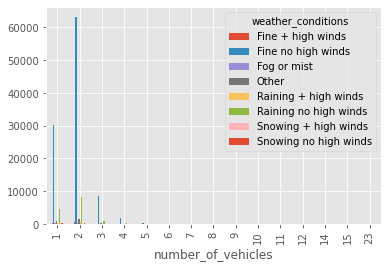

In [3]:
# How did the weather conditions affect the number of cars in the accident?

plt.style.use('ggplot')

accidents_df.groupby(['number_of_vehicles', 'weather_conditions'])\
      .weather_conditions.count().unstack().plot.bar(legend=True)

plt.show()

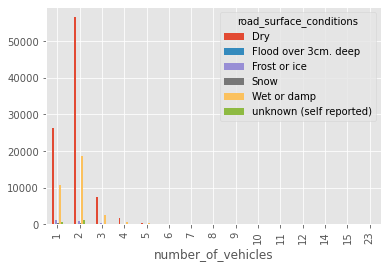

In [4]:
#Relation between the number of vehicles in the accident and the surface conditions
plt.style.use('ggplot')

accidents_df.groupby(['number_of_vehicles', 'road_surface_conditions'])\
      .road_surface_conditions.count().unstack().plot.bar(legend=True)

plt.show()

<AxesSubplot:xlabel='number_of_vehicles'>

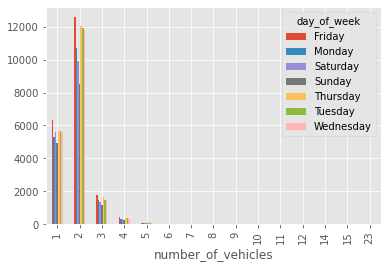

In [5]:
# what is the relation between the day of the week and the number of vehicles in the accident?
plt.style.use('ggplot')

accidents_df.groupby(['number_of_vehicles', 'day_of_week'])\
      .day_of_week.count().unstack().plot.bar(legend=True)


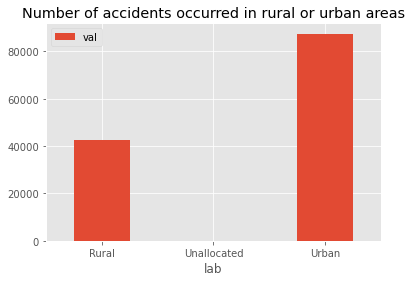

In [6]:
#Number of accidents occurred in rural or urban areas

result3 = (accidents_df.groupby('urban_or_rural_area').number_of_vehicles.value_counts().unstack().fillna(0))
result3 = result3.sum(axis=1)
df = pd.DataFrame({'lab':['Rural', 'Unallocated', 'Urban'], 'val':[42522, 10, 87450]})
ax = df.plot.bar(x='lab', y='val', rot=0)
plt.title("Number of accidents occurred in rural or urban areas")
plt.show()


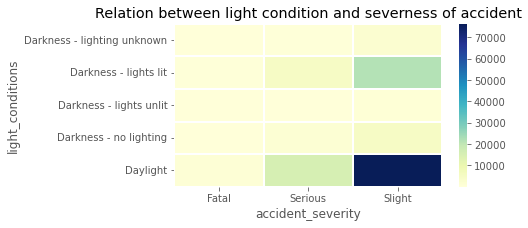

In [7]:
#Relation between light condition and severness of accident

plt.figure(figsize=(6,3))
plt.title("Relation between light condition and severness of accident")
result1 = (accidents_df.groupby('light_conditions').accident_severity.value_counts().unstack().fillna(0))
sns.heatmap(result1,cmap="YlGnBu", linewidths=.4)
plt.show()

In [8]:
# observing the total number of missing values for each column 
y=accidents_df[accidents_df.isnull().any(axis=1)]

y.isnull().sum()

'''
- [ ] Location easting _osgr /Location northing_osgr {MCAR} No location: As we cannot impute the missing data from any other columns.
- [ ] Accident_severity {MCAR} As we cannot impute the missing data from any other columns.
- [ ] Urban or rural {MCAR} As we cannot impute the missing data from any other columns.
- [ ] Longitude/Latitude  the accident severity has 6 serious out of 29 {MAR} the places where the location is not mentioned by default the accident severity is put to slight by default.( MCAR) 
- [ ] Road Type {null} the first Road number and the second road number all C or unclassified {MAR}
- [ ] Junction detail: MCAR As there is no relationship between the missing values and any other columns.
- [ ] Junction Control: (MAR) not junction within 20 metres(junction detail column)
- [ ] Light conditions:(MCAR) As there is no relationship between the missing values and any other columns.
- [ ] Second road number: (MAR) not junction within 20 meters( junction detail column) there is a relationship between them.
- [ ] pedestrian_crossing_human_control:(MCAR):As there is no relationship between the missing values and any other columns.
- [ ] pedestrian_crossing_physical_facilities:(MCAR): As there is no relationship between the missing values and any other columns.
- [ ] Weather conditions:(MNAR): not ignorable as we need to understand why the data is missing.
'''

'\n- [ ] Location easting _osgr /Location northing_osgr {MCAR} No location: As we cannot impute the missing data from any other columns.\n- [ ] Accident_severity {MCAR} As we cannot impute the missing data from any other columns.\n- [ ] Urban or rural {MCAR} As we cannot impute the missing data from any other columns.\n- [ ] Longitude/Latitude  the accident severity has 6 serious out of 29 {MAR} the places where the location is not mentioned by default the accident severity is put to slight by default.( MCAR) \n- [ ] Road Type {null} the first Road number and the second road number all C or unclassified {MAR}\n- [ ] Junction detail: MCAR As there is no relationship between the missing values and any other columns.\n- [ ] Junction Control: (MAR) not junction within 20 metres(junction detail column)\n- [ ] Light conditions:(MCAR) As there is no relationship between the missing values and any other columns.\n- [ ] Second road number: (MAR) not junction within 20 meters( junction detail co

In [9]:
# observing all rows for a specific column with null values
accidents_df[accidents_df['weather_conditions'].isna()]
#x.to_csv('out.csv', index=False) 


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
14,2017010009365,2017,10009365,553430.0,189040.0,0.212939,51.579345,Metropolitan Police,Slight,2,...,unknown (self reported),Darkness - lighting unknown,NaN,unknown (self reported),unknown (self reported),unknown (self reported),Urban,No,Non-trunk,E01002381
59,2017010009435,2017,10009435,533430.0,187480.0,-0.076106,51.570412,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Daylight,NaN,Frost or ice,None,None,Urban,Yes,Non-trunk,E01001799
67,2017010009443,2017,10009443,524740.0,196370.0,-0.198265,51.652294,Metropolitan Police,Serious,1,...,"Pelican, puffin, toucan or similar non-junctio...",Daylight,NaN,Wet or damp,None,None,Urban,Yes,Non-trunk,E01000250
141,2017010009712,2017,10009712,546410.0,183090.0,0.109228,51.527748,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Daylight,NaN,Wet or damp,None,None,Urban,Yes,Non-trunk,E01000091
150,2017010009761,2017,10009761,532020.0,160340.0,-0.106555,51.326844,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Daylight,NaN,Dry,None,None,Urban,Yes,Non-trunk,E01001069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129510,201797UC01710,2017,97UC01710,240114.0,638332.0,-4.540009,55.612236,Strathclyde,Slight,1,...,No physical crossing facilities within 50 metres,Daylight,NaN,Wet or damp,None,None,Rural,Yes,NaN,-1
129603,201797UD00302,2017,97UD00302,233410.0,633274.0,-4.643267,55.564588,Strathclyde,Slight,1,...,No physical crossing facilities within 50 metres,Daylight,NaN,Dry,None,None,Urban,No,NaN,-1
129614,201797UD00512,2017,97UD00512,236693.0,628570.0,-4.588489,55.523476,Strathclyde,Slight,6,...,No physical crossing facilities within 50 metres,Daylight,NaN,Frost or ice,None,None,Rural,Yes,NaN,-1
129908,2017983138917,2017,983138917,296772.0,576630.0,-3.618241,55.073364,Dumfries and Galloway,Slight,2,...,No physical crossing facilities within 50 metres,Daylight,NaN,Dry,None,Other object on road,Urban,No,NaN,-1


In [10]:
# getting the name of columns into a list
AllColumns= []
for i in accidents_df.columns:
    AllColumns.append(i)
#AllColumns=AllColumns[1:]

In [11]:
# Getting the total number of duplicates
print(accidents_df.duplicated(subset=AllColumns).sum())

0


In [12]:
# used to drop all duplicates, but never used as there are no duplicates:
accidents_df.drop_duplicates(keep='first',subset=AllColumns,inplace=True)

<AxesSubplot:>

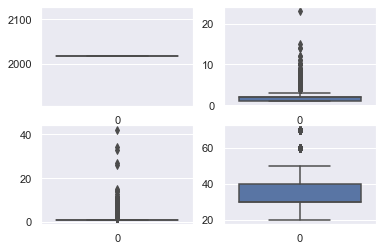

In [13]:
# observing outliers of all numeric columns 
AllNumericColumns=[]
for i in AllColumns:
    if pd.to_numeric(accidents_df[i], errors='coerce').notnull().all()== True:
        AllNumericColumns.append(i)
sns.set()
fig, axes = plt.subplots(2, 2)
sns.boxplot(data=accidents_df[AllNumericColumns[0]], ax=axes[0,0])
sns.boxplot(data=accidents_df[AllNumericColumns[1]], ax=axes[0,1])
sns.boxplot(data=accidents_df[AllNumericColumns[2]], ax=axes[1,0])
sns.boxplot(data=accidents_df[AllNumericColumns[3]], ax=axes[1,1])

In [14]:
# observing outliers
Q1 = accidents_df.quantile(0.25)
Q3 = accidents_df.quantile(0.75)
IQR = Q3 - Q1
((accidents_df < (Q1 - 1.5 * IQR)) | (accidents_df > (Q3 + 1.5 * IQR))).sum()

C:\Users\20100\AppData\Local\Temp/ipykernel_14332/2079934701.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((accidents_df < (Q1 - 1.5 * IQR)) | (accidents_df > (Q3 + 1.5 * IQR))).sum()


accident_index                                     0
accident_reference                                 0
accident_severity                                  0
accident_year                                      0
carriageway_hazards                                0
date                                               0
day_of_week                                        0
did_police_officer_attend_scene_of_accident        0
first_road_class                                   0
first_road_number                                  0
junction_control                                   0
junction_detail                                    0
latitude                                        1359
light_conditions                                   0
local_authority_district                           0
local_authority_highway                            0
local_authority_ons_district                       0
location_easting_osgr                            412
location_northing_osgr                        

In [15]:
# removing outliers from numeric columns: 
print("Old Shape: ", accidents_df.shape)
for i in AllNumericColumns:

    Q1 = accidents_df[i].quantile(0.25)
    Q3 = accidents_df[i].quantile(0.75)
    IQR = Q3 - Q1
    cut_off = IQR * 1.5
    lower = Q1 - cut_off
    upper =  Q3 + cut_off
    ''' Removing the Outliers '''
    accidents_df = accidents_df[(accidents_df[i] <= upper) & (accidents_df[i] >= lower)]

print("New Shape: ", accidents_df.shape)

Old Shape:  (129982, 36)
New Shape:  (84864, 36)


In [16]:
# filling missing values by the mode of the column for non numeric columns and by the mean for numeric values
for i in AllColumns:
    if pd.to_numeric(accidents_df[i], errors='coerce').notnull().all()== False:
        accidents_df[i].fillna(accidents_df[i].mode().iloc[0], inplace=True)
    else:
        mean_value=accidents_df[i].mean()
        accidents_df[i].fillna(value=mean_value, inplace=True)

D:\study_machine\lib\site-packages\pandas\core\algorithms.py:969: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  warn(f"Unable to sort modes: {err}")


In [17]:
# Converting 'date' column from object to DateTime
accidents_df['date'] =  pd.to_datetime(accidents_df['date'])

In [18]:
# adding a new column called week number calculated from the date column
weekNumber=[]
for index, row in accidents_df.iterrows():
    weekNumber.append(row['date'].week)
accidents_df['Week number']=weekNumber

In [19]:
for i in accidents_df:
    if pd.to_numeric(accidents_df[i], errors='coerce').notnull().all()== False:
        accidents_df[i] = accidents_df[i].astype(str)

In [20]:
# inserting a new column that shows if the date of the accident was in a weekend(saturday or sunday)
#by inserting 1 and otherwise it will insert 0 
DayOfWeeks=[]
for index, row in accidents_df.iterrows():
   
    if(row['date'].dayofweek==6 or row['date'].dayofweek==5):
        DayOfWeeks.append(1)
    else:
        DayOfWeeks.append(0)
accidents_df["weekend"]=DayOfWeeks 

In [21]:
# inserting a new column that specifies if the accident occured at night by inserting 1 or occured at morning by inserting 0 
morning_or_night=[]
AllTime= accidents_df["time"]
AllTime= AllTime.values
AllTime = AllTime.tolist()
for time in AllTime:
    if(int(time[:2])>18 or int(time[:2])< 5):
        morning_or_night.append(1)
    else:
        morning_or_night.append(0)

        
accidents_df["morning_or_night"]=morning_or_night

In [22]:
import os
path_encoding_labels='encodeing_labels/'
if not os.path.exists(path_encoding_labels):
    os.mkdir(path_encoding_labels)


In [23]:
# Label enocder was used to encode categorical columns as there are more than 2 unique values so it's better 
#than one One-hot Encoding
# Function to encode categorical attributes in a given dataset as numbers
accidents_df['date']=accidents_df['date'].astype(str)

#
def mapping_to_df(mapping):
    df=pd.DataFrame(columns=["code"],data=mapping.values())
    df.index=mapping.keys()
    return df


def number_encode_features(df):
    result = df.copy() # take a copy of the dataframe
    for column in result.columns:
        if result.dtypes[column] == np.object: # if attribute is categorical
            # Apply LabelEncoder method to attribute
            # fit will infer the number of numerical values needed by counting the number of categories
            # then transform will replace each category with its numerical counterpart
            encoder=preprocessing.LabelEncoder()
            result[column] = encoder.fit_transform(result[column])
            mapping= dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
            df_labels= mapping_to_df(mapping)
            df_labels.to_csv(path_encoding_labels+column+'.csv')
    return result


accidents_df = number_encode_features(accidents_df)

C:\Users\20100\AppData\Local\Temp/ipykernel_14332/1030871365.py:16: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if result.dtypes[column] == np.object: # if attribute is categorical


In [24]:
#change in data after applying Label enocder:
accidents_df.head(5)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week number,weekend,morning_or_night
1,0,2017,16511,526790.0,181970.0,-0.173845,51.522425,29,2,2,...,4,3,1,2,2,0,3895,52,1,1
2,1,2017,16512,535200.0,181260.0,-0.052969,51.514096,29,2,3,...,0,3,1,2,2,0,3555,52,1,1
3,2,2017,16513,534340.0,193560.0,-0.060658,51.624832,29,2,2,...,4,3,1,2,2,0,1192,52,1,1
4,3,2017,16514,533680.0,187820.0,-0.072372,51.573408,29,1,1,...,4,3,1,2,2,0,1494,52,1,1
5,4,2017,16515,514510.0,172370.0,-0.353876,51.438762,29,2,2,...,4,3,1,2,2,0,3238,52,1,1


In [25]:
#Normalizing all columns with bigger ranges compared to other columns. 
#so that they exist on a common scale, allowing them to be more easily compared
#all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.
#MinMaxScaler are used because the upper and lower boundaries are well known from domain knowledge.
AllColumns=['location_easting_osgr','location_northing_osgr',"lsoa_of_accident_location"]
for i in AllColumns:
    accidents_df[i] = accidents_df[i]/accidents_df[i].abs().max()

In [26]:
accidents_df.to_csv('final.csv', index=False) 